<a href="https://colab.research.google.com/github/nandhukumar86/mykagglesubmissions/blob/master/how_much_did_it_rain_ii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# # install kaggle
# ! pip install -q kaggle

# # upload file to Colab
# from google.colab import files
# files.upload()

# # create kaggle folder in root and copy the file.
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/

# # provide permissions
# ! chmod 600 ~/.kaggle/kaggle.json

# # download competition files by providing competition name
# ! kaggle competitions download -c 'how-much-did-it-rain-ii'

# # unzip the files and folders
# #! unzip train.csv.zip -d train
# #! unzip test.csv.zip -d test


In [2]:
# ! unzip train.zip -d train
# ! unzip test.zip -d test

In [3]:
import pandas as pd
import numpy as np

In [4]:
df_train = pd.read_csv('/content/train/train.csv')
df_test = pd.read_csv('/content/test/test.csv')

In [5]:
df_train.tail()

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
13765196,1180945,38,9.0,33.0,19.5,25.5,36.5,33.0,20.5,28.0,36.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.636004
13765197,1180945,42,9.0,33.0,21.0,30.5,37.0,36.5,22.0,33.5,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.636004
13765198,1180945,47,9.0,29.5,10.0,26.0,30.5,31.0,16.5,26.0,33.0,1.041667,NaN,1.025000,1.051667,1.75,NaN,0.750,3.0000,13.379990,NaN,NaN,13.379990,8.636004
13765199,1180945,52,9.0,19.0,NaN,15.5,26.5,19.0,NaN,16.5,26.5,NaN,NaN,NaN,1.051667,NaN,NaN,NaN,2.8125,NaN,NaN,NaN,NaN,8.636004
13765200,1180945,57,9.0,7.5,NaN,10.0,13.0,14.5,10.0,12.5,16.0,1.051667,0.845,1.021667,1.051667,0.00,-1.125,0.375,3.2500,6.069992,NaN,-8.029999,6.069992,8.636004


In [6]:
df_test.tail()

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th
8022751,717625,40,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8022752,717625,44,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8022753,717625,48,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8022754,717625,52,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8022755,717625,56,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,13765201.0,592336.986614,340856.086251,1.000000,296897.000000,592199.000000,889582.000000,1.180945e+06
minutes_past,13765201.0,29.523733,17.308131,0.000000,15.000000,30.000000,44.000000,5.900000e+01
radardist_km,13765201.0,11.067943,4.206618,0.000000,9.000000,11.000000,14.000000,2.100000e+01
Ref,6349375.0,22.926658,10.355157,-31.000000,16.000000,22.500000,29.500000,7.100000e+01
Ref_5x5_10th,5283988.0,19.952271,9.208166,-32.000000,14.000000,20.000000,26.000000,6.250000e+01
Ref_5x5_50th,6356482.0,22.610287,10.053000,-32.000000,16.000000,22.500000,29.000000,6.900000e+01
Ref_5x5_90th,7551281.0,25.898461,11.109579,-28.500000,18.000000,25.500000,33.500000,7.250000e+01
RefComposite,6716343.0,24.711081,10.689622,-32.000000,17.500000,24.000000,31.500000,9.250000e+01
RefComposite_5x5_10th,5755673.0,22.158238,9.702705,-31.000000,16.000000,22.000000,28.500000,6.600000e+01
RefComposite_5x5_50th,6711663.0,24.420753,10.424526,-27.500000,17.500000,24.000000,31.500000,7.100000e+01


In [8]:
df_train.dtypes

Id                         int64
minutes_past               int64
radardist_km             float64
Ref                      float64
Ref_5x5_10th             float64
Ref_5x5_50th             float64
Ref_5x5_90th             float64
RefComposite             float64
RefComposite_5x5_10th    float64
RefComposite_5x5_50th    float64
RefComposite_5x5_90th    float64
RhoHV                    float64
RhoHV_5x5_10th           float64
RhoHV_5x5_50th           float64
RhoHV_5x5_90th           float64
Zdr                      float64
Zdr_5x5_10th             float64
Zdr_5x5_50th             float64
Zdr_5x5_90th             float64
Kdp                      float64
Kdp_5x5_10th             float64
Kdp_5x5_50th             float64
Kdp_5x5_90th             float64
Expected                 float64
dtype: object

In [9]:
df_train.isnull().sum()

Id                              0
minutes_past                    0
radardist_km                    0
Ref                       7415826
Ref_5x5_10th              8481213
Ref_5x5_50th              7408719
Ref_5x5_90th              6213920
RefComposite              7048858
RefComposite_5x5_10th     8009528
RefComposite_5x5_50th     7053538
RefComposite_5x5_90th     5935998
RhoHV                     8830285
RhoHV_5x5_10th            9632047
RhoHV_5x5_50th            8828633
RhoHV_5x5_90th            7859617
Zdr                       8830285
Zdr_5x5_10th              9632047
Zdr_5x5_50th              8828633
Zdr_5x5_90th              7859617
Kdp                       9582566
Kdp_5x5_10th             10336419
Kdp_5x5_50th              9577920
Kdp_5x5_90th              8712425
Expected                        0
dtype: int64

In [10]:
corr_matrix = df_train.corr()            
upper = corr_matrix.abs().where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))
high_correlation_features = [column for column in upper.columns if any(upper[column] > 0.8)]


In [11]:
high_correlation_features = [column for column in upper.columns if any(upper[column] > 0.7)]

In [12]:
high_correlation_features

['Ref_5x5_10th',
 'Ref_5x5_50th',
 'Ref_5x5_90th',
 'RefComposite',
 'RefComposite_5x5_10th',
 'RefComposite_5x5_50th',
 'RefComposite_5x5_90th',
 'RhoHV_5x5_50th']

In [13]:
df_train.drop(columns= high_correlation_features, inplace=True)
df_test.drop(columns= high_correlation_features, inplace=True)

In [14]:
df_train.isnull().sum()

Id                       0
minutes_past             0
radardist_km             0
Ref                7415826
RhoHV              8830285
RhoHV_5x5_10th     9632047
RhoHV_5x5_90th     7859617
Zdr                8830285
Zdr_5x5_10th       9632047
Zdr_5x5_50th       8828633
Zdr_5x5_90th       7859617
Kdp                9582566
Kdp_5x5_10th      10336419
Kdp_5x5_50th       9577920
Kdp_5x5_90th       8712425
Expected                 0
dtype: int64

In [15]:
df_train.query('Id == 4')

,Id,minutes_past,radardist_km,Ref,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
30,4,0,9.0,18.5,NaN,NaN,0.998333,NaN,NaN,NaN,1.4375,NaN,NaN,NaN,NaN,4.064002
31,4,5,9.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.064002
32,4,9,9.0,35.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.064002
33,4,14,9.0,16.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.064002
34,4,19,9.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.064002
35,4,23,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.064002
36,4,28,9.0,32.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.064002
37,4,33,9.0,41.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.064002
38,4,38,9.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.064002
39,4,42,9.0,29.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.064002


In [16]:
X_train = df_train.groupby(['Id']).mean()
X_test = df_test.groupby(['Id']).mean()

In [17]:
X_train.drop(columns= ['minutes_past'], inplace=True)
X_test.drop(columns= ['minutes_past'], inplace=True)

In [18]:
X_train.head()

,radardist_km,Ref,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
Id,,,,,,,,,,,,,,
1,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
2,2.0,16.625,0.998611,0.993611,1.000000,0.380208,0.119792,0.416667,0.781250,-0.288187,-1.448893,-0.319096,1.116661,1.016001
3,10.0,NaN,NaN,NaN,0.801667,NaN,NaN,NaN,2.062500,NaN,NaN,NaN,NaN,26.162014
4,9.0,26.600,0.988333,NaN,1.015833,-1.125000,NaN,0.500000,1.515625,7.029999,NaN,0.000000,6.329994,4.064002
5,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,774.700440


In [19]:
y_train = X_train.pop('Expected')

In [20]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

sImputer_array_train = imputer.fit_transform(X_train)
sImputer_array_test = imputer.transform(X_test)

In [21]:
features = X_test.columns

In [22]:
X_train_imputed = pd.DataFrame(sImputer_array_train, columns = features)
X_test_imputed = pd.DataFrame(sImputer_array_test, columns = features)

In [23]:
X_train_imputed.head()

,radardist_km,Ref,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th
0,10.0,21.336602,0.977571,0.919720,1.014938,0.595266,-0.791519,0.222968,1.983754,0.048311,-3.641417,-0.848601,3.733510
1,2.0,16.625000,0.998611,0.993611,1.000000,0.380208,0.119792,0.416667,0.781250,-0.288187,-1.448893,-0.319096,1.116661
2,10.0,21.336602,0.977571,0.919720,0.801667,0.595266,-0.791519,0.222968,2.062500,0.048311,-3.641417,-0.848601,3.733510
3,9.0,26.600000,0.988333,0.919720,1.015833,-1.125000,-0.791519,0.500000,1.515625,7.029999,-3.641417,0.000000,6.329994
4,13.0,21.336602,0.977571,0.919720,1.014938,0.595266,-0.791519,0.222968,1.983754,0.048311,-3.641417,-0.848601,3.733510


In [24]:
y_id = df_test['Id']

In [25]:
X_train

,radardist_km,Ref,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th
Id,,,,,,,,,,,,,
1,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,16.625000,0.998611,0.993611,1.000000,0.380208,0.119792,0.416667,0.781250,-0.288187,-1.448893,-0.319096,1.116661
3,10.0,NaN,NaN,NaN,0.801667,NaN,NaN,NaN,2.062500,NaN,NaN,NaN,NaN
4,9.0,26.600000,0.988333,NaN,1.015833,-1.125000,NaN,0.500000,1.515625,7.029999,NaN,0.000000,6.329994
5,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180941,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1180942,9.0,15.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1180943,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
y_id = X_test.reset_index()['Id']

In [27]:
y_id 

0              1
1              2
2              3
3              4
4              5
           ...  
717620    717621
717621    717622
717622    717623
717623    717624
717624    717625
Name: Id, Length: 717625, dtype: int64

In [28]:
corr_matrix = X_train_imputed.corr()            
upper = corr_matrix.abs().where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))
high_correlation_features = [column for column in upper.columns if any(upper[column] > 0.8)]


In [29]:
high_correlation_features

[]

In [30]:
X_train_imputed.head()

,radardist_km,Ref,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th
0,10.0,21.336602,0.977571,0.919720,1.014938,0.595266,-0.791519,0.222968,1.983754,0.048311,-3.641417,-0.848601,3.733510
1,2.0,16.625000,0.998611,0.993611,1.000000,0.380208,0.119792,0.416667,0.781250,-0.288187,-1.448893,-0.319096,1.116661
2,10.0,21.336602,0.977571,0.919720,0.801667,0.595266,-0.791519,0.222968,2.062500,0.048311,-3.641417,-0.848601,3.733510
3,9.0,26.600000,0.988333,0.919720,1.015833,-1.125000,-0.791519,0.500000,1.515625,7.029999,-3.641417,0.000000,6.329994
4,13.0,21.336602,0.977571,0.919720,1.014938,0.595266,-0.791519,0.222968,1.983754,0.048311,-3.641417,-0.848601,3.733510


In [31]:
X_test_imputed.head()

,radardist_km,Ref,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th
0,8.0,10.500000,1.011667,0.848333,1.043571,-0.546875,-1.750000,0.062500,2.598214,-1.523336,-3.641417,-1.290003,2.601664
1,15.0,21.336602,0.977571,0.919720,1.014938,0.595266,-0.791519,0.222968,1.983754,0.048311,-3.641417,-0.848601,3.733510
2,11.0,23.722222,0.927333,0.895333,0.981333,0.418750,-0.562500,0.456250,1.825000,0.219994,-4.359003,0.169997,5.382997
3,9.0,30.812500,0.967667,0.931667,0.982143,0.100000,-0.537500,0.177083,1.241071,0.911996,-2.890003,-0.140002,5.563329
4,17.0,21.336602,0.977571,0.919720,1.014938,0.595266,-0.791519,0.222968,1.983754,0.048311,-3.641417,-0.848601,3.733510


In [32]:
y_train.head()

Id
1      0.254000
2      1.016001
3     26.162014
4      4.064002
5    774.700440
Name: Expected, dtype: float64

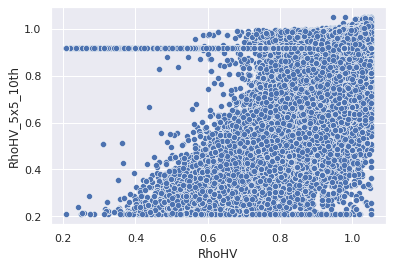

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline


sns.scatterplot(x = 'RhoHV', y = 'RhoHV_5x5_10th', data = X_train_imputed)

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

pl = Pipeline([
               ('scaler', StandardScaler()),
               ('pca', PCA(0.95)),
               ('reg', DummyRegressor())
])

In [35]:
models = []
models.append(('Linear Regression', LinearRegression()))
# models.append(('SVM Regressor', svm.SVR()))
models.append(('Decision Tree Regressor', DecisionTreeRegressor()))
# models.append(('Ada Boost Regressor', AdaBoostRegressor())) negative result
models.append(('Lasso Regressor', Lasso()))
models.append(('Ridge Regressor', Ridge()))
# models.append(('Random Forest Regressor', RandomForestRegressor()))


In [50]:
for model in models:
  
  pl = Pipeline([
               ('scaler', StandardScaler()),
              #  ('pca', PCA(0.95)),
               ('reg', model[1])
  ])

  reduced_array = pl.fit(X_train_imputed, y_train)
  y_test_predict = pl.predict(X_test_imputed)

  print(model[0], ' - Training Score: ', pl.score(X_train_imputed, y_train))

Linear Regression  - Training Score:  0.01573526624193633
Decision Tree Regressor  - Training Score:  0.2732004276943083
Lasso Regressor  - Training Score:  0.015707603860264485
Ridge Regressor  - Training Score:  0.01573526624191912


In [48]:
y_train_transformed = np.log(y_train)

In [49]:
y_train_transformed.describe()

count    1.180945e+06
mean     5.277145e-01
std      2.457159e+00
min     -4.605170e+00
25%     -1.370421e+00
50%      1.587384e-02
75%      1.337630e+00
max      1.040480e+01
Name: Expected, dtype: float64

In [51]:
for model in models:
  
  pl = Pipeline([
               ('scaler', StandardScaler()),
              #  ('pca', PCA(0.95)),
               ('reg', model[1])
  ])

  reduced_array = pl.fit(X_train_imputed, y_train_transformed)
  y_test_predict = pl.predict(X_test_imputed)

  print(model[0], ' - Training Score: ', pl.score(X_train_imputed, y_train_transformed))

Linear Regression  - Training Score:  0.037356800154684455
Decision Tree Regressor  - Training Score:  0.43136968670183695
Lasso Regressor  - Training Score:  0.0
Ridge Regressor  - Training Score:  0.03735680015464926


In [52]:
pl = Pipeline([
               ('scaler', StandardScaler()),
               ('reg', DecisionTreeRegressor())
  ])

reduced_array = pl.fit(X_train_imputed, y_train_transformed)
y_test_predict = pl.predict(X_test_imputed)

print(pl.score(X_train_imputed, y_train_transformed))


0.43136968670183684


In [53]:
y_test_predict = np.exp(y_test_predict)

In [54]:
y_id

0              1
1              2
2              3
3              4
4              5
           ...  
717620    717621
717621    717622
717622    717623
717623    717624
717624    717625
Name: Id, Length: 717625, dtype: int64

In [55]:
y_test_predict

array([  0.25400013,  18.11860622, 166.37009   , ...,   0.50800025,
         2.22861715,  18.11860622])

In [56]:
df = pd.concat([pd.DataFrame(y_id),pd.DataFrame(y_test_predict)], axis=1, ignore_index=True)
df.columns = ['Id','Expected']
df.to_csv('Submission.csv', index=False)



In [57]:
df.head()

,Id,Expected
0,1,0.254000
1,2,18.118606
2,3,166.370090
3,4,1.178964
4,5,1.964141


In [58]:
!kaggle competitions submit -c how-much-did-it-rain-ii -f /content/Submission.csv -m "Decision Tree Regressor"

100% 17.0M/17.0M [00:03<00:00, 5.14MB/s]
Successfully submitted to How Much Did It Rain? II